Chuẩn bị Dataset

In [ ]:
import os
import shutil
import glob

# === 🟩 CHỈNH Ở ĐÂY ===
# Danh sách các folder input chứa ảnh
input_folders = [
    "/content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/datatest/image",
    "/content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/datavalid/image",
    "/content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/datatrain",
]

# Thư mục output (nơi gom ảnh)
output_folder = "/content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/output_image"
# =======================

os.makedirs(output_folder, exist_ok=True)

# Các định dạng ảnh cần gom
img_exts = ("*.jpg", "*.jpeg", "*.png", "*.bmp", "*.tif", "*.tiff")

count = 0
for folder in input_folders:
    for ext in img_exts:
        for img_path in glob.glob(os.path.join(folder, ext)):
            img_name = os.path.basename(img_path)
            # tránh trùng tên
            base, extn = os.path.splitext(img_name)
            dst_path = os.path.join(output_folder, img_name)
            i = 1
            while os.path.exists(dst_path):
                dst_path = os.path.join(output_folder, f"{base}_{i}{extn}")
                i += 1
            shutil.copy2(img_path, dst_path)
            count += 1

print(f"✅ Đã gom {count} ảnh vào thư mục: {output_folder}")


✅ Đã gom 14630 ảnh vào thư mục: /content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/output_image


In [ ]:
import os, cv2

root_in   = "/content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/datatest/test"   # thư mục gốc chứa nhiều thư mục con
out_dir   = "/content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/datatest/image"
os.makedirs(out_dir, exist_ok=True)

exts = {".mp4",".avi",".mov",".mkv"}
target_fps = 2  # mỗi giây lấy ~2 frame

vid_paths = []
for dp, _, files in os.walk(root_in):
    for f in files:
        if os.path.splitext(f)[1].lower() in exts:
            vid_paths.append(os.path.join(dp, f))

print(f"Found {len(vid_paths)} videos")

for vid in vid_paths:
    cap = cv2.VideoCapture(vid)
    fps = cap.get(cv2.CAP_PROP_FPS) or 30
    interval = max(1, int(round(fps/target_fps)))
    stem = os.path.splitext(os.path.relpath(vid, root_in))[0]  # tên tương đối (có cả thư mục con)
    stem = stem.replace(os.sep, "_")                           # tránh dấu '/'
    i = 0; idx = 0
    while True:
        ok, frame = cap.read()
        if not ok: break
        if idx % interval == 0:
            out = os.path.join(out_dir, f"{stem}_{i:06d}.jpg")
            cv2.imwrite(out, frame)
            i += 1
        idx += 1
    cap.release()
print("Done.")


Found 6 videos
Done.


In [ ]:
# Xóa duplicates (giữ 1 file mỗi hash)
import os, hashlib
from collections import defaultdict

folder = "/content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/output_image"

def md5(path, chunk=8192):
    h = hashlib.md5()
    with open(path, "rb") as f:
        while True:
            b = f.read(chunk)
            if not b:
                break
            h.update(b)
    return h.hexdigest()

hash_map = defaultdict(list)
for f in os.listdir(folder):
    p = os.path.join(folder, f)
    if os.path.isfile(p):
        try:
            h = md5(p)
            hash_map[h].append(p)
        except:
            pass

dupes = {h:ps for h,ps in hash_map.items() if len(ps) > 1}
removed = 0
for h, ps in dupes.items():
    # sort to keep deterministic one (e.g., smallest name)
    ps_sorted = sorted(ps)
    keep = ps_sorted[0]
    to_remove = ps_sorted[1:]
    for p in to_remove:
        os.remove(p)
        removed += 1

print("Đã xóa duplicate files:", removed)


In [ ]:
import os

folder = "/content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/output_image"
exts = {".jpg", ".jpeg", ".png", ".bmp"}

count = sum(
    1
    for f in os.listdir(folder)
    if os.path.splitext(f)[1].lower() in exts
)

print(f"Tổng số ảnh trong thư mục: {count}")


Tổng số ảnh trong thư mục: 14630


In [ ]:
import os

def count_images_in_folder(folder_path):
    """
    Đếm số lượng tệp ảnh trong một thư mục dựa trên các đuôi mở rộng phổ biến.
    """
    # Các đuôi mở rộng ảnh phổ biến (có thể thêm hoặc bớt)
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp')

    # Khởi tạo bộ đếm
    image_count = 0

    # Kiểm tra xem thư mục có tồn tại không
    if not os.path.isdir(folder_path):
        print(f"Lỗi: Thư mục '{folder_path}' không tồn tại hoặc không hợp lệ.")
        return 0

    # Lặp qua tất cả các tệp và thư mục con trong thư mục đã cho
    for file_name in os.listdir(folder_path):
        # Tạo đường dẫn đầy đủ đến tệp
        file_path = os.path.join(folder_path, file_name)

        # Kiểm tra xem đó có phải là một tệp không
        if os.path.isfile(file_path):
            # Lấy đuôi mở rộng của tệp và chuyển sang chữ thường để kiểm tra
            ext = os.path.splitext(file_name)[1].lower()

            # Kiểm tra xem đuôi mở rộng có nằm trong danh sách ảnh không
            if ext in image_extensions:
                image_count += 1

    return image_count

# --- SỬ DỤNG CHƯƠNG TRÌNH ---

# 1. Thay thế đường dẫn này bằng đường dẫn thư mục của bạn
folder_to_check = '/content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/trainyolo/train/valid/images'

# 2. Thực hiện đếm
total_images = count_images_in_folder(folder_to_check)

# 3. In kết quả
if total_images > 0:
    print(f"✅ Đã tìm thấy {total_images} tệp ảnh trong thư mục: {folder_to_check}")

✅ Đã tìm thấy 496 tệp ảnh trong thư mục: /content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/trainyolo/train/valid/images


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/trainyolo/detect car.v6i.yolov8.zip' -d '/content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/trainyolo/trainnew'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/trainyolo/trainnew/train/labels/test_S06_c041_vdo_000180_jpg.rf.984bea8356cfe74f38b4c69c6a26b968.txt  
  inflating: /content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/trainyolo/trainnew/train/labels/test_S06_c041_vdo_000180_jpg.rf.9927456fa10c2ef1c4cb1854f8a456a7.txt  
  inflating: /content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/trainyolo/trainnew/train/labels/test_S06_c041_vdo_000180_jpg.rf.d8f55feda2e0c0e4bbfeba8cd90fb5de.txt  
  inflating: /content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/trainyolo/trainnew/train/labels/test_S06_c041_vdo_000184_jpg.rf.05d5da7fd15cd4f7d32a570f5e969e73.txt  
  inflating: /content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/trainyolo/trainnew/train/labels/test_S06_c041_vdo_000184_jpg.rf.5617b00f3876e9894851c7bc27c9a2ea.txt  
  inflating: /content/drive/MyDrive/DA2/data/AICity22

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Download video

In [ ]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-" -O vehicle-counting.mp4 && rm -rf /tmp/cookies.txt

In [ ]:
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/DA2/220453_small.mp4"

## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **23.01.2023** with version **YOLOv8.0.17**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

In [ ]:
# Pip install method (recommended)

!pip install "ultralytics<=8.3.40"

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.7/112.6 GB disk)


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data='/content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/trainyolo/trainnew/data.yaml' epochs=80 imgsz=640 batch=-1 device=0 patience=15 \
project='/content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/trainyolo' name='traindata' exist_ok=True

100% 6.25M/6.25M [00:00<00:00, 174MB/s]
New https://pypi.org/project/ultralytics/8.3.221 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/trainyolo/trainnew/data.yaml, epochs=80, time=None, patience=15, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=/content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/trainyolo, name=traindata, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True,

In [ ]:
# predict_for_roboflow.py
# Yêu cầu trước: pip install ultralytics opencv-python tqdm
# Chỉnh CONFIG phía dưới trước khi chạy.

from ultralytics import YOLO
from pathlib import Path
import os, shutil, glob
import cv2
from tqdm import tqdm

# ========== CONFIG ==========
WEIGHTS = "/content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/trainyolo/run/weights/best.pt"            # đường dẫn model .pt của bạn
INPUT_DIRS = [                               # danh sách folder chứa ảnh (có thể 1 folder)
    "/content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/output_image",
    # "/path/to/images_folder2",
]
RECURSIVE = True                             # True = tìm cả subfolders
OUTPUT_DIR = "/content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/image label"       # nơi tạo images/ và labels/
CONF_THRESH = 0.25
IOU = 0.45
DEVICE = 0           # 0 (GPU) or "cpu"
CREATE_EMPTY_TXT = True  # tạo .txt rỗng cho ảnh không detect
# ===========================

# Prepare output folders
images_out = os.path.join(OUTPUT_DIR, "images")
labels_out = os.path.join(OUTPUT_DIR, "labels")
os.makedirs(images_out, exist_ok=True)
os.makedirs(labels_out, exist_ok=True)

# gather image paths
IMG_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp")
paths = []
for d in INPUT_DIRS:
    p = Path(d)
    if not p.exists():
        print(f"[WARN] input path not found: {d}")
        continue
    if RECURSIVE:
        for ext in IMG_EXTS:
            paths.extend([str(x) for x in p.rglob(f"*{ext}")])
    else:
        for ext in IMG_EXTS:
            paths.extend([str(x) for x in p.glob(f"*{ext}")])

# deduplicate and sort
paths = sorted(list(dict.fromkeys(paths)))
print(f"Found {len(paths)} images to process.")
RESUME = True
if RESUME:
    remaining = []
    for p in paths:
        base = os.path.splitext(os.path.basename(p))[0]
        txt_path = os.path.join(labels_out, base + ".txt")
        # nếu file txt không tồn tại -> cần xử lý
        if not os.path.exists(txt_path):
            remaining.append(p)
    skipped = len(paths) - len(remaining)
    print(f"[RESUME] Skipping {skipped} already-labeled images.")
    paths = remaining
    print(f"[RESUME] Remaining images to process: {len(paths)}")

# load model
if WEIGHTS and os.path.exists(WEIGHTS):
    model = YOLO(WEIGHTS)
else:
    raise FileNotFoundError(f"Model weight not found at {WEIGHTS}")

# helper to write YOLO txt
def save_yolo_txt(boxes, img_w, img_h, out_txt_path):
    # boxes: list of [xmin, ymin, xmax, ymax, cls_id, conf]
    lines = []
    for xmin, ymin, xmax, ymax, cls_id, conf in boxes:
        x_c = (xmin + xmax) / 2.0
        y_c = (ymin + ymax) / 2.0
        bw = xmax - xmin
        bh = ymax - ymin
        x_c_n = max(0.0, min(1.0, x_c / img_w))
        y_c_n = max(0.0, min(1.0, y_c / img_h))
        bw_n = max(0.0, min(1.0, bw / img_w))
        bh_n = max(0.0, min(1.0, bh / img_h))
        lines.append(f"{int(cls_id)} {x_c_n:.6f} {y_c_n:.6f} {bw_n:.6f} {bh_n:.6f}")
    with open(out_txt_path, "w", encoding="utf-8") as f:
        if lines:
            f.write("\n".join(lines))
        else:
            f.write("")

# process images
n_with = 0
n_without = 0
for img_path in tqdm(paths, desc="Predict -> create YOLO labels"):
    # read image size (to normalize)
    img = cv2.imread(img_path)
    if img is None:
        print("Can't read:", img_path)
        continue
    h, w = img.shape[:2]

    # model.predict per image (keeps control of outputs)
    try:
        results = model.predict(img_path, conf=CONF_THRESH, iou=IOU, device=DEVICE, verbose=False)
        res = results[0]
    except Exception as e:
        print("Inference error for", img_path, e)
        continue

    boxes_to_save = []
    if hasattr(res, "boxes") and len(res.boxes) > 0:
        # preferred numpy path
        try:
            xyxy = res.boxes.xyxy.cpu().numpy()
            cls = res.boxes.cls.cpu().numpy()
            confs = res.boxes.conf.cpu().numpy()
            for (xmin, ymin, xmax, ymax), c, cf in zip(xyxy, cls, confs):
                boxes_to_save.append([float(xmin), float(ymin), float(xmax), float(ymax), int(c), float(cf)])
        except Exception:
            # fallback iteration
            for b in res.boxes:
                arr = b.xyxy.tolist()[0]
                cid = int(b.cls.tolist()[0])
                conf = float(b.conf.tolist()[0])
                boxes_to_save.append([arr[0], arr[1], arr[2], arr[3], cid, conf])

    # copy image into images_out (keep basename, avoid overwrite by adding suffix if needed)
    base = os.path.basename(img_path)
    dst_img = os.path.join(images_out, base)
    if os.path.exists(dst_img):
        name, ext = os.path.splitext(base)
        i = 1
        while True:
            candidate = f"{name}_{i}{ext}"
            dst_img = os.path.join(images_out, candidate)
            if not os.path.exists(dst_img):
                break
            i += 1
    shutil.copy2(img_path, dst_img)

    # write label file with same basename
    name_wo_ext = os.path.splitext(os.path.basename(dst_img))[0]
    out_txt = os.path.join(labels_out, name_wo_ext + ".txt")
    if boxes_to_save:
        save_yolo_txt(boxes_to_save, w, h, out_txt)
        n_with += 1
    else:
        n_without += 1
        if CREATE_EMPTY_TXT:
            open(out_txt, "w", encoding="utf-8").close()
        else:
            if os.path.exists(out_txt):
                os.remove(out_txt)

print("Done.")
print(f"Images with detections: {n_with}")
print(f"Images without detections: {n_without}")
print("Output folder ready for Roboflow:", os.path.abspath(OUTPUT_DIR))


Found 14630 images to process.
[RESUME] Skipping 9530 already-labeled images.
[RESUME] Remaining images to process: 5100


Predict -> create YOLO labels: 100%|██████████| 5100/5100 [1:55:19<00:00,  1.36s/it]

Done.
Images with detections: 4996
Images without detections: 104
Output folder ready for Roboflow: /content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/image label


In [ ]:
import os
import glob
from roboflow import Roboflow

# ========== THIẾT LẬP ==========
# Lấy API Key từ cài đặt tài khoản Roboflow
rf = Roboflow(api_key="NaVdCOAVZSY52ofbRf6k")
# Tên Workspace và Project của bạn
project = rf.workspace("hh-aqt7y").project("detect-car-b7wz9")

# Đường dẫn thư mục GỐC chứa images/ và labels/
DATA_DIR = "/content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/image label"

# ========== XỬ LÝ ==========
IMAGE_DIR = os.path.join(DATA_DIR, "images")
LABEL_DIR = os.path.join(DATA_DIR, "labels")

# Thu thập tất cả các file ảnh trong thư mục
image_paths = glob.glob(os.path.join(IMAGE_DIR, "*.jpg")) # Hoặc sử dụng "*.png"

for image_path in image_paths:
    # Lấy tên file ảnh (ví dụ: 'image_001')
    base_name_no_ext = os.path.splitext(os.path.basename(image_path))[0]

    # Tạo đường dẫn tới file nhãn .txt tương ứng
    label_path = os.path.join(LABEL_DIR, base_name_no_ext + ".txt")

    if os.path.exists(label_path):
        print(f"Uploading {base_name_no_ext} with YOLO label...")
        # Sử dụng single_upload để tải file ảnh và file nhãn (.txt) lên
        project.single_upload(
            image_path=image_path,
            # Roboflow sẽ tự động nhận dạng định dạng YOLO từ file .txt
            annotation_path=label_path,
            split="train", # Có thể tùy chọn 'train', 'valid', 'test', hoặc bỏ qua
        )
    else:
        print(f"Warning: No label file found for {base_name_no_ext}. Uploading image only.")
        project.single_upload(image_path=image_path)

print("✅ Tải lên hoàn tất!")

loading Roboflow workspace...
loading Roboflow project...
Uploading test_S06_c044_vdo_000234 with YOLO label...
Uploading test_S06_c044_vdo_000233 with YOLO label...
Uploading test_S06_c044_vdo_000245 with YOLO label...
Uploading test_S06_c044_vdo_000243 with YOLO label...
Uploading test_S06_c044_vdo_000249 with YOLO label...
Uploading test_S06_c044_vdo_000253 with YOLO label...
Uploading test_S06_c044_vdo_000244 with YOLO label...
Uploading test_S06_c044_vdo_000250 with YOLO label...
Uploading test_S06_c044_vdo_000266 with YOLO label...
Uploading test_S06_c044_vdo_000270 with YOLO label...
Uploading test_S06_c044_vdo_000278 with YOLO label...
Uploading test_S06_c044_vdo_000275 with YOLO label...
Uploading test_S06_c044_vdo_000260 with YOLO label...
Uploading test_S06_c044_vdo_000267 with YOLO label...
Uploading test_S06_c044_vdo_000276 with YOLO label...
Uploading test_S06_c044_vdo_000279 with YOLO label...
Uploading test_S06_c044_vdo_000259 with YOLO label...
Uploading test_S06_c044_

AnnotationSaveError: <Response [503]>

In [ ]:
import os

# Đường dẫn thư mục bạn muốn nén trên Google Drive
SOURCE_FOLDER = "/content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/image label"

# Tên file ZIP bạn muốn tạo. Tốt nhất là tạo file ZIP trong thư mục /content/
# để tốc độ nén nhanh hơn (trên bộ nhớ cục bộ của Colab)
ZIP_NAME = "roboflow_upload_data.zip"
TARGET_ZIP_PATH = os.path.join("/content", ZIP_NAME)

# Lệnh nén:
# -r: nén đệ quy (bao gồm các thư mục con)
# -j: loại bỏ đường dẫn thư mục (tùy chọn, có thể bỏ)
# SOURCE_FOLDER/*: nén tất cả nội dung bên trong thư mục
print(f"Bắt đầu nén thư mục {SOURCE_FOLDER}...")

# Lệnh này nén các file BÊN TRONG thư mục SOURCE_FOLDER
!zip -r "{TARGET_ZIP_PATH}" "{SOURCE_FOLDER}"
# Nếu bạn muốn cấu trúc ZIP chỉ có images/ và labels/ ở cấp cao nhất,
# bạn nên dùng lệnh zip -r "{TARGET_ZIP_PATH}" "{SOURCE_FOLDER}/images" "{SOURCE_FOLDER}/labels"

print(f"✅ Hoàn tất nén. File ZIP đã tạo tại: {TARGET_ZIP_PATH}")

Streaming output truncated to the last 5000 lines.
  adding: content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/image label/labels/test_S06_c046_vdo_000187.txt (deflated 54%)
  adding: content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/image label/labels/test_S06_c046_vdo_000188.txt (deflated 55%)
  adding: content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/image label/labels/test_S06_c046_vdo_000189.txt (deflated 55%)
  adding: content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/image label/labels/test_S06_c046_vdo_000190.txt (deflated 55%)
  adding: content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/image label/labels/test_S06_c046_vdo_000191.txt (deflated 55%)
  adding: content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/image label/labels/test_S06_c046_vdo_000192.txt (deflated 56%)
  adding: content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/image label/labels/test_S06_c046_vdo_000193.txt (deflated 54%)
  adding: content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/image label/

In [ ]:
from google.colab import files

# Sử dụng đường dẫn file ZIP đã tạo ở Bước 2
files.download(TARGET_ZIP_PATH)

print("✅ Trình duyệt sẽ bắt đầu tải file ZIP về máy tính của bạn.")

NameError: name 'TARGET_ZIP_PATH' is not defined

In [ ]:
import shutil
import os
from google.colab import drive

# 1. Mount Google Drive (Nếu chưa làm)
# drive.mount('/content/drive')

# Đường dẫn thư mục dữ liệu GỐC của bạn trên Google Drive
SOURCE_DRIVE_FOLDER = "/content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/image label"

# Đường dẫn thư mục CỤC BỘ trên máy chủ Colab
TARGET_LOCAL_FOLDER = "/content/local_data_for_zip"

print(f"Bắt đầu sao chép {SOURCE_DRIVE_FOLDER} sang bộ nhớ cục bộ...")

# Tạo thư mục đích cục bộ
os.makedirs(TARGET_LOCAL_FOLDER, exist_ok=True)

# Sao chép toàn bộ nội dung (images/ và labels/)
shutil.copytree(SOURCE_DRIVE_FOLDER, TARGET_LOCAL_FOLDER, dirs_exist_ok=True)

print("✅ Hoàn tất sao chép sang bộ nhớ cục bộ.")

Bắt đầu sao chép /content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/image label sang bộ nhớ cục bộ...
✅ Hoàn tất sao chép sang bộ nhớ cục bộ.


In [ ]:
# Tên file ZIP sẽ được tạo
ZIP_NAME = "final_data_to_download.zip"
TARGET_ZIP_PATH = os.path.join("/content", ZIP_NAME)

# Chạy lệnh nén ZIP trên thư mục cục bộ
print(f"Bắt đầu nén file từ {TARGET_LOCAL_FOLDER}...")

# Lệnh này sẽ tạo file ZIP (/content/final_data_to_download.zip)
# và nén nội dung bên trong /content/local_data_for_zip
!zip -r "{TARGET_ZIP_PATH}" "{TARGET_LOCAL_FOLDER}"

print(f"✅ Hoàn tất nén. File ZIP đã tạo: {TARGET_ZIP_PATH}")

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  adding: content/local_data_for_zip/images/S01_c002_vdo_000109.jpg (deflated 3%)
  adding: content/local_data_for_zip/images/S01_c003_vdo_000094.jpg (deflated 1%)
  adding: content/local_data_for_zip/images/S03_c010_vdo_000170.jpg (deflated 1%)
  adding: content/local_data_for_zip/images/test_S06_c042_vdo_000182.jpg (deflated 0%)
  adding: content/local_data_for_zip/images/S03_c010_vdo_000246.jpg (deflated 2%)
  adding: content/local_data_for_zip/images/test_S06_c045_vdo_000017.jpg (deflated 1%)
  adding: content/local_data_for_zip/images/test_S06_c043_vdo_000022.jpg (deflated 1%)
  adding: content/local_data_for_zip/images/S01_c002_vdo_000134.jpg (deflated 2%)
  adding: content/local_data_for_zip/images/S04_c038_vdo_000067.jpg (deflated 3%)
  adding: content/local_data_for_zip/images/S01_c003_vdo_000036.jpg (deflated 6%)
  adding: content/local_data_for_zip/images/validation_S05_c022_vdo_000068.jpg (deflated 1%)
  adding: conte

In [ ]:
from google.colab import files

# Tải file ZIP từ bộ nhớ cục bộ về máy tính
files.download(TARGET_ZIP_PATH)

print("✅ Trình duyệt sẽ bắt đầu tải file ZIP về máy tính cá nhân của bạn.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Trình duyệt sẽ bắt đầu tải file ZIP về máy tính cá nhân của bạn.


In [ ]:
cp '/content/final_data_to_download.zip' '/content/drive/MyDrive/AICity22_Track1_MTMC_Tracking'

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 142.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="NaVdCOAVZSY52ofbRf6k")
workspace = rf.workspace("hh-aqt7y")

workspace.deploy_model(
  model_type="yolov8",
  model_path="/content/drive/MyDrive/DA2/data/AICity22_Track1_MTMC_Tracking/trainyolo/train",
  project_ids=["detect-car-b7wz9"],
  model_name="custom"
)

loading Roboflow workspace...
Dependency ultralytics==8.0.196 is required but found version=8.3.40, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment for project detect-car-b7wz9 at: https://app.roboflow.com/hh-aqt7y/detect-car-b7wz9/models


## Install ByteTrack

[ByteTrack](https://github.com/ifzhang/ByteTrack) is great tracker but a bit poorly packaged. We need to jump through some fire hoops to make it work in tandem with [YOLOv8](https://github.com/ultralytics/ultralytics).

In [ ]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack

# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric
# workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
!pip install -q loguru lap thop

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [ ]:

%cd '/content/drive/MyDrive/DA2/ByteTrack_fixed'
!pip install -q -r requirements.txt cython_bbox onemetric loguru thop lapx ninja
!python3 setup.py -q develop

from IPython import display
display.clear_output()




In [ ]:
import sys
import numpy as np   # 👉 thêm dòng này

sys.path.append("/content/drive/MyDrive/DA2/ByteTrack_fixed")

# Fix lỗi tương thích NumPy mới (>=1.24)
if not hasattr(np, "float"):
    np.float = float
if not hasattr(np, "int"):
    np.int = int

import yolox
print("yolox.__version__:", yolox.__version__)


yolox.__version__: 0.1.0


In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

## Install Roboflow Supervision

In [ ]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


In [ ]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

## Tracking utils

Unfortunately, we have to manually match the bounding boxes coming from our model with those created by the tracker.

In [ ]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

## Load pre-trained YOLOv8 model

In [ ]:
# settings
MODEL = "yolov8n.pt"

In [ ]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


## Predict and annotate single frame

In [ ]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names
print(CLASS_NAMES_DICT)
# class_ids of interest - car, motorcycle, bus and truck
CLASS_ID = [2, 3, 5, 7]

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw


0: 640x384 (no detections), 79.8ms
Speed: 19.5ms preprocess, 79.8ms inference, 120.9ms postprocess per image at shape (1, 3, 640, 384)


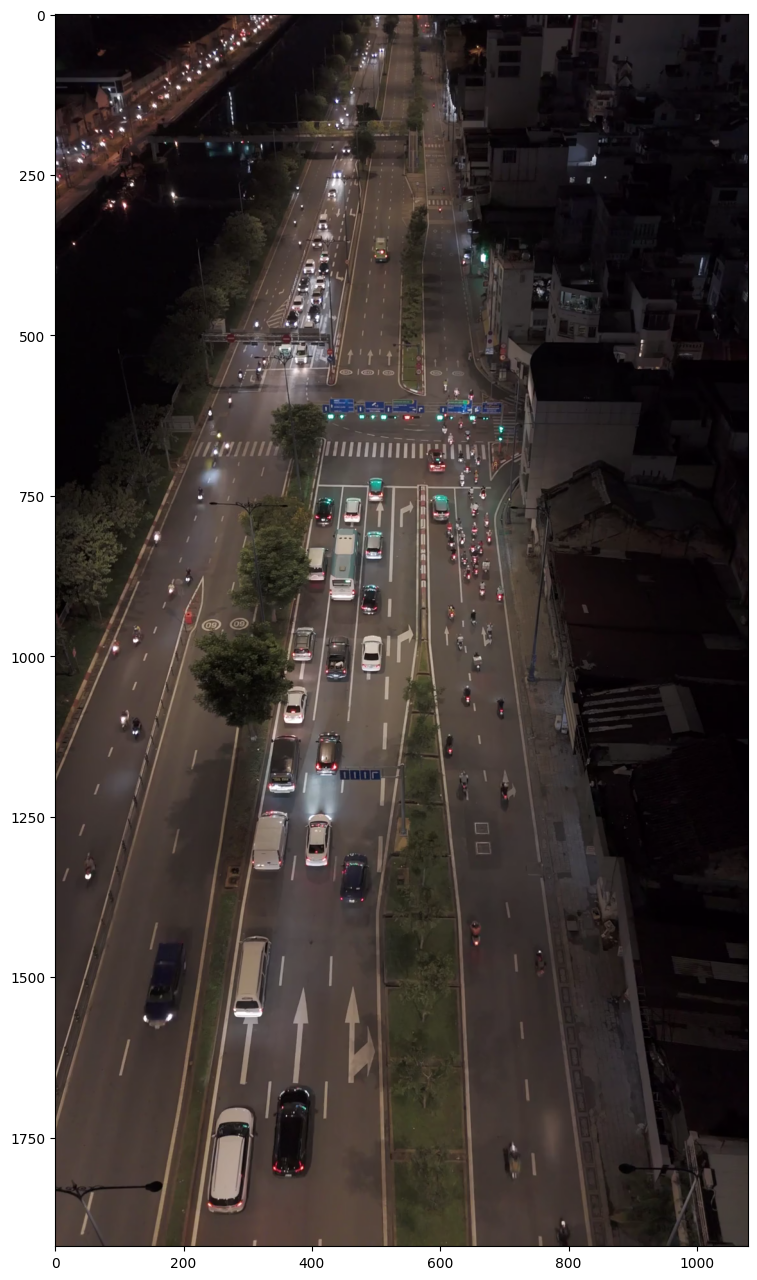

In [ ]:
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)
# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]
# annotate and display frame
frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

## Predict and annotate whole video

In [ ]:
# settings
LINE_START = Point(0, 1000)
LINE_END = Point(1080, 1000)

TARGET_VIDEO_PATH = "/content/drive/MyDrive/DA2/vehicle2.mp4"

In [ ]:
VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1080, height=1920, fps=29, total_frames=672)

In [ ]:
from tqdm.notebook import tqdm


# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create LineCounter instance
line_counter = LineCounter(start=LINE_START, end=LINE_END)
# create instance of BoxAnnotator and LineCounterAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
line_annotator = LineCounterAnnotator(thickness=4, text_thickness=4, text_scale=2)

# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )
        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]
        # updating line counter
        line_counter.update(detections=detections)
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        line_annotator.annotate(frame=frame, line_counter=line_counter)
        sink.write_frame(frame)

  0%|          | 0/672 [00:00<?, ?it/s]


0: 640x384 (no detections), 6.5ms
Speed: 2.3ms preprocess, 6.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 5.9ms
Speed: 2.5ms preprocess, 5.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 7.2ms
Speed: 2.8ms preprocess, 7.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 9.5ms
Speed: 5.3ms preprocess, 9.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 6.3ms
Speed: 3.0ms preprocess, 6.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 6.0ms
Speed: 2.5ms preprocess, 6.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 6.4ms
Speed: 2.9ms preprocess, 6.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 10.6ms
Speed: 5.3ms preprocess, 10.6ms inference, 0.7m

In [10]:
import json
import os

NOTEBOOK_PATH = "/content/drive/MyDrive/AICity22_Track1_MTMC_Tracking/test drive/Bản sao của Bản sao của DA2new.ipynb" # Thay bằng đường dẫn chính xác

try:
    # Đọc nội dung file JSON
    with open(NOTEBOOK_PATH, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Xóa khóa 'widgets' trong metadata
    if 'widgets' in data.get('metadata', {}):
        del data['metadata']['widgets']
        print("✅ Đã xóa khóa 'metadata.widgets'.")

        # Ghi lại file đã chỉnh sửa
        with open(NOTEBOOK_PATH, 'w', encoding='utf-8') as f:
            json.dump(data, f, indent=1)
        print("✅ Đã lưu lại file Notebook.")
    else:
        print("Thông báo: Khóa 'metadata.widgets' không tồn tại trong file này.")

except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file Notebook tại {NOTEBOOK_PATH}")
except Exception as e:
    print(f"Lỗi xảy ra trong quá trình xử lý JSON: {e}")

✅ Đã xóa khóa 'metadata.widgets'.
✅ Đã lưu lại file Notebook.
